### Feature Selection/Feature Engineering/Modelling

Ames data set is part of the Kaggle Competition for data Scientists.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)




sns.set_style('ticks')


### Load the Data

In [2]:
## import training data set
df = pd.read_csv('../datasets/train_cleaned.csv')

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

1stflrsf  2ndflrsf  3ssnporch  alley  bedroomabvgr  bsmtcond  bsmtexposure  \
0       725       754          0      0             3         3             1   
1       913      1209          0      0             4         3             1   
2      1057         0          0      0             3         3             1   
3       744       700          0      0             3         3             1   
4       831       614          0      0             3         4             1   

   bsmtfinsf1  bsmtfinsf2  bsmtfintype1  bsmtfintype2  bsmtfullbath  \
0       533.0         0.0             6             1           0.0   
1       637.0         0.0             6             1           1.0   
2       731.0         0.0             6             1           1.0   
3         0.0         0.0             1             1           0.0   
4         0.0         0.0             1             1           0.0   

   bsmthalfbath  bsmtqual  bsmtunfsf  electrical  enclosedporch  extercond  \
0           0.0         3      192.0         0.0              0          3   
1           0.0         4      276.0         0.0              0          3   
2           0.0         3      326.0         0.0              0          4   
3           0.0         4      384.0         0.0              0          3   
4           0.0         2      676.0         0.0              0          3   

   exterqual  fence  fireplacequ  fireplaces  fullbath  functional  \
0          4      0            0           0         2           0   
1          4      0            3           1         2           0   
2          3      0            0           0         1           0   
3          3      0            0           0         2           0   
4          3      0            0           0         2           0   

   garagearea  garagecars  garagecond garagefinish  garagequal  garageyrblt  \
0       475.0         2.0           3          RFn           3       1976.0   
1       559.0         2.0           3          RFn           3       1997.0   
2       246.0         1.0           3          Unf           3       1953.0   
3       400.0         2.0           3          Fin           3       2007.0   
4       484.0         2.0           3          Unf           3       1957.0   

   grlivarea  halfbath  heatingqc   id  kitchenabvgr  kitchenqual  landslope  \
0       1479         1          5  109             1            4          0   
1       2122         1          5  544             1            4          0   
2       1057         0          3  153             1            4          0   
3       1444         1          4  318             1            3          0   
4       1445         0          3  255             1            3          0   

   lotarea  lotfrontage  lotshape  lowqualfinsf  masvnrarea  miscval  \
0    13517    72.774648         1             0       289.0        0   
1    11492    43.000000         1             0       132.0        0   
2     7922    68.000000         0             0         0.0        0   
3     9802    73.000000         0             0         0.0        0   
4    14235    82.000000         1             0         0.0        0   

   openporchsf  overallcond  overallqual  paveddrive        pid  poolarea  \
0           44            8            6           2  533352170         0   
1           74            5            7           2  531379050         0   
2           52            7            5           2  535304180         0   
3            0            5            5           2  916386060         0   
4           59            8            6           0  906425045         0   

   poolqc  saleprice  screenporch  totalbsmtsf  totrmsabvgrd  utilities  \
0       0     130500            0        725.0             6          0   
1       0     220000            0        913.0             8          0   
2       0     109000            0       1057.0             5          0   
3       0     174000            0        384.0 

In [4]:
df.shape

(2048, 207)

### Feature Engineering

It is worth noting that the variables that were correlated with sales price have changed slightly.

**Before Data cleaning:**
- overallqual	0.800207
- grlivarea	0.697038
- garagearea	0.650270
- garagecars	0.648220
- totalbsmtsf	0.628925
- 1stflrsf	0.618486
- yearbuilt	0.571849
- yearremod/add	0.550370
- fullbath	0.537969
- garageyrblt	0.533922

**After Data cleaning:**
- overallqual	0.800975
- exterqual	0.712880
- grlivarea	0.698046
- kitchenqual	0.692190
- garagearea	0.650000
- garagecars	0.648103
- totalbsmtsf	0.631507
- 1stflrsf	0.621181
- bsmtqual	0.617419
- yearbuilt	0.572256

In [5]:
np.abs(df.corr())[['saleprice']].sort_values('saleprice', ascending=False)

saleprice
saleprice                      1.000000
overallqual                    0.800975
exterqual                      0.712880
grlivarea                      0.698046
kitchenqual                    0.692190
garagearea                     0.650000
garagecars                     0.648103
totalbsmtsf                    0.631507
1stflrsf                       0.621181
bsmtqual                       0.617419
yearbuilt                      0.572256
garageyrblt                    0.550883
yearremod/add                  0.550055
fireplacequ                    0.538252
fullbath                       0.537369
foundation_PConc               0.530973
masvnrarea                     0.504025
totrmsabvgrd                   0.502909
fireplaces                     0.470091
heatingqc                      0.459327
neighborhood_dummies_NridgHt   0.449007
bsmtexposure                   0.425634
bsmtfinsf1                     0.424463
garagetype_Detchd              0.369449
saletype_New                   0.358378
garagetype_Attchd              0.356984
foundation_CBlock              0.356187
mssubclass_60                  0.355699
bsmtfintype1                   0.351319
exterior1st_VinylSd            0.342441
...                                 ...
exterior2nd_CBlock             0.021337
roofstyle_Mansard              0.021319
mosold_8                       0.020470
saletype_ConLI                 0.019594
miscfeature_Gar2               0.019533
neighborhood_dummies_SawyerW   0.016684
bsmtfinsf2                     0.016393
yrsold                         0.015330
condition1_RRAn                0.014991
lotconfig_FR2                  0.014868
bsmtfintype2                   0.014047
roofstyle_Shed                 0.013141
condition1_RRNn                0.011442
mosold_2                       0.011262
housestyle_2.5Unf              0.010787
exterior2nd_BrkFace            0.010673
condition2_Norm                0.009747
miscfeature_Othr               0.008855
mosold_11                      0.008403
miscval                        0.007398
roofmatl_Tar&Grv               0.007009
mosold_10                      0.006859
mosold_6                       0.006777
mosold_5                       0.005507
saletype_CWD                   0.004554
neighborhood_dummies_Greens    0.003472
foundation_Wood                0.003052
mosold_12                      0.002450
alleygrvl                           NaN
alleypave                           NaN

[206 rows x 1 columns]

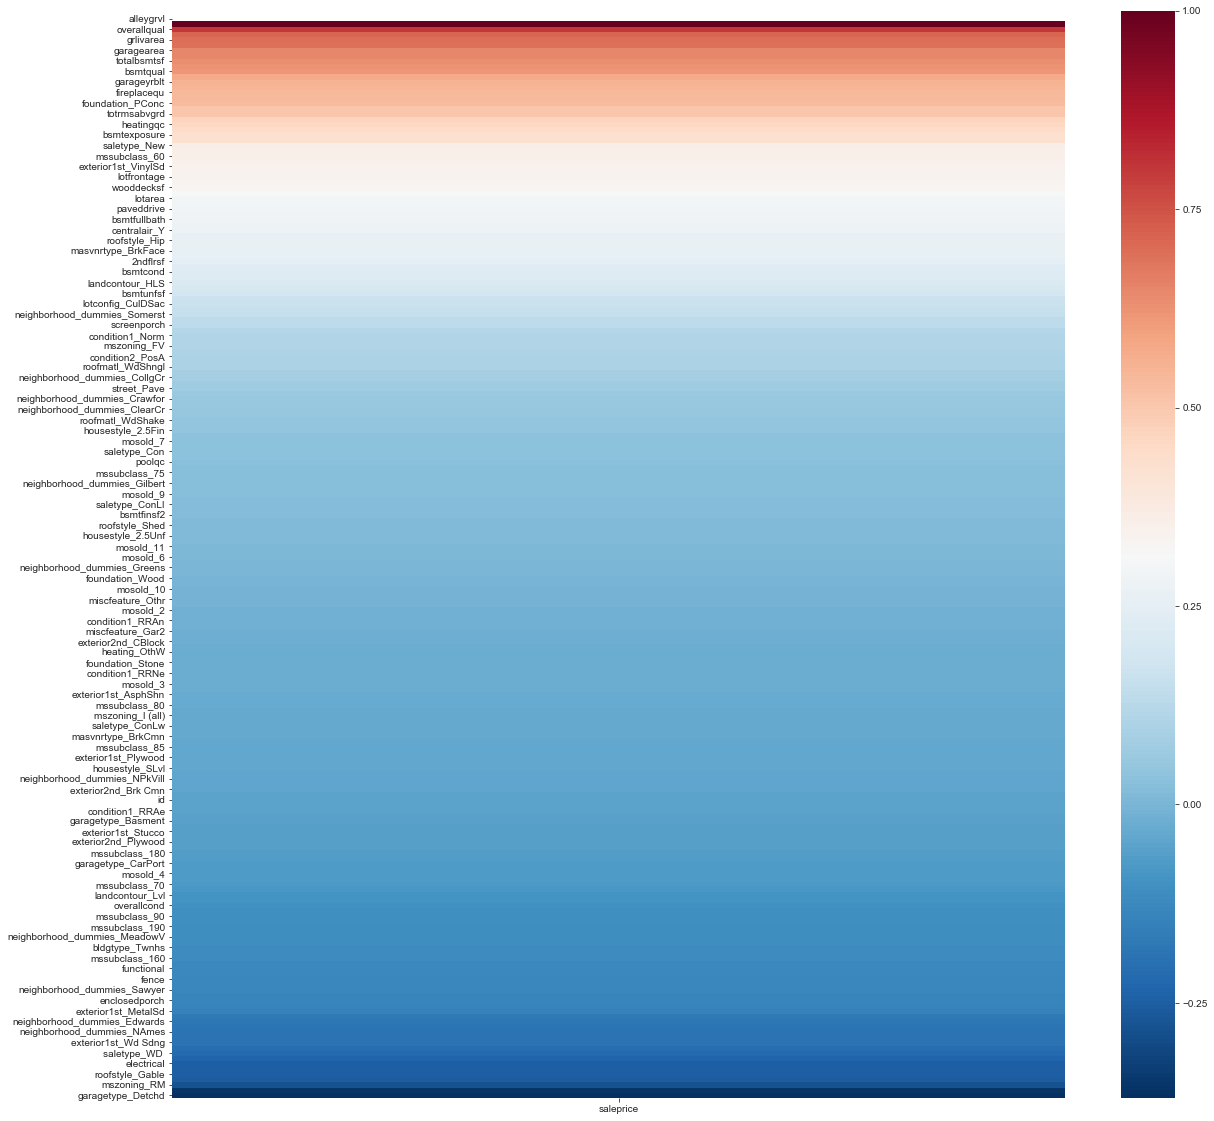

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'),
             cmap='RdBu_r', ax=ax);
ax.invert_yaxis()

#### Outliers

In [7]:
# dropping obvious outliers seen in scatter plots from EDA
df.drop(df[df['grlivarea'] > 4_500].index, inplace = True)
df.drop(df[df['lotfrontage'] > 300].index, inplace = True)
df.drop(df[df['lotarea'] > 100_000].index, inplace = True)

In [8]:
#### Log transformation
num_features=['lotfrontage', 'lotarea', '1stflrsf', 'grlivarea', 'saleprice']

for feature in num_features:
    df[feature]=np.log(df[feature])


In [9]:
df.shape

(2043, 207)

#### Model Prep: Create features using matrix X and target vector y

In [10]:
features = [col for col in df._get_numeric_data().columns if col != 'saleprice' and col != 'pid']

X = df[features]
y = df['saleprice']

print(X.shape)
print(y.shape)

(2043, 204)
(2043,)


#### Model Prep: Train/Test Split

In [11]:
# we want to have a holdout set to test our model
# train/test split allows us to split our X and y variables into a training set and a holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)

(1430, 204)
(1430,)


#### Model Prep: Scaling

Scaled into the same format so that we can see what the strongest predictor is, use across all training data sets.
Trying to find z scores, normalised scores wrt to mean and sd.
As we don't know test srt, we are always going to use mu and sigma.
We use training set statistics to transform test set.
It changes them into a matrix.

In [12]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

#### Hyperparameter Tuning

In [13]:
# Ridge alpha

r_alpha = np.logspace (0,5,200)
# fits multiple alphas
ridgecv = RidgeCV(alphas = r_alpha, cv = 5)
ridgecv = ridgecv.fit(X_train_sc, y_train)

print('optimal ridge alpha: ', ridgecv.alpha_)
print('best ridge R2: ', ridgecv.score(X_train_sc, y_train))

optimal ridge alpha:  32.17641750250737
best ridge R2:  0.9499926261744784


In [14]:
# Lasso alpha
l_alpha = np.arange(0.001,0.15,0.0025)

# fits multiple alphas
lassocv = LassoCV(alphas = l_alpha, cv = 5)
lassocv = lassocv.fit(X_train_sc, y_train)

print('optimal lasso alpha: ', lassocv.alpha_)
print('best lasso R2: ', lassocv.score(X_train_sc, y_train))

optimal lasso alpha:  0.001
best lasso R2:  0.9472442922184922


In [15]:
# Elastic net alpha and lambda
enet_alpha = np.arange(0, 1, 0.005)
enet_ratio = [.01, .1, .2, .3, .5, .7, .9, .95, .99, 1]

# fits multiple alphas and rhos
enetcv = ElasticNetCV(alphas = enet_alpha, l1_ratio = enet_ratio, cv = 5)
enetcv = enetcv.fit(X_train_sc, y_train)

print('optimal enet alpha: ', enetcv.alpha_)
print('optimal enet lambda: ', enetcv.l1_ratio_)
print('best elastic net R2: ', enetcv.score(X_train_sc, y_train))


/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.495203801174426, tolerance: 0.01882020190245558
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.709370067594108, tolerance: 0.

/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.33576436060639, tolerance: 0.018781023942810733
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.495203817762956, tolerance: 0.

/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.252862030343607, tolerance: 0.01882091149317971
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.322120202486843, tolerance: 0.

optimal enet alpha:  0.005
optimal enet lambda:  0.1
best elastic net R2:  0.9495036187395606


/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Shandeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.335764372177323, tolerance: 0.018781023942810733
  tol, rng, random, positive)


### Cross Validation

Using cross val score and fine tuning the model using the hyperparameters, **Lasso Regression** performed best after comparing R^2 models among other models such as the Standard Linear Regression model, Ridge Regression and the Elastic Net model. Linear regression produced the worst result, which further supports the importance of regularised models. This could have been due to several factors; the number of features that were taken into consideration, the high degree of generalisation and so on.

#### Linear Regression

In [16]:
lr = LinearRegression()

In [17]:
# Cross Validation
nfolds = 5 
def crossval(model, x, y):
    kf = KFold(nfolds, shuffle = True, random_state = 42)
    rmse = np.sqrt(-cross_val_score(model, x, y, cv = kf, scoring = 'neg_mean_squared_error'))
    r2 = cross_val_score(model, x, y, cv = kf)
    return 'mean CV R2:', r2.mean(), \
            'mean CV RMSE:', rmse.mean()
            

In [18]:
print('Linear Regression: \n', crossval(lr, X_train_sc, y_train))

Linear Regression: 
 ('mean CV R2:', -2.6603255938332492e+20, 'mean CV RMSE:', 2732974919.6020064)


#### Ridge Regression

In [19]:
ridge = Ridge(alpha = ridgecv.alpha_)

In [20]:
print('RIDGE: \n', crossval(ridge, X_train_sc, y_train))

RIDGE: 
 ('mean CV R2:', 0.9186596754777184, 'mean CV RMSE:', 0.11447777636067813)


#### Lasso Regression

In [21]:
lasso = Lasso(alpha = lassocv.alpha_)

In [22]:
print('LASSO: \n', crossval(lasso, X_train_sc, y_train))

LASSO: 
 ('mean CV R2:', 0.9205551576069168, 'mean CV RMSE:', 0.1130480595684138)


#### Elastic Net Regression

In [23]:
enet = ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_)

In [24]:
print('ELASTIC NET: \n', crossval(enet, X_train_sc, y_train))

ELASTIC NET: 
 ('mean CV R2:', 0.9199422042955441, 'mean CV RMSE:', 0.1135223514425215)


### Model Fitting and Evaluation

As Lasso regression produced best result on the training data set, this model will be used on the test data set. Initial analysis suggests that my training set could be facing problems with overfitting. The R2 of the model has dropped when applying the model on the test set. This would imply that the model doesn't generalise too well on unseen data as its variance is a little too high. The goal now is to attempt to fine tune the model such that the variance could be decreased and the bias increased ever so slightly.

In [25]:
def rmse(ytest, ypred):
    return np.sqrt(mean_squared_error(y_test, ypred))

In [26]:
# fitting model to train data
lr = lr.fit(X_train_sc, y_train)

# predicting model on test data
ypred = lr.predict(X_test_sc)

# model performance
print('Linear Regression model test R2: ', lr.score(X_test_sc, y_test))
print('Linear Regression model test RMSE: ', rmse(y_test, ypred))

Linear Regression model test R2:  -5498955.486232451
Linear Regression model test RMSE:  1001.7236842572172


In [27]:
# fitting model to train data
ridge = ridge.fit(X_train_sc, y_train)

# predicting model on test data
ypred = ridge.predict(X_test_sc)

# model performance
print('Ridge Regression model test R2: ', ridge.score(X_test_sc, y_test))
print('Ridge Regression model test RMSE: ', rmse(y_test, ypred))

Ridge Regression model test R2:  0.8970132249437166
Ridge Regression model test RMSE:  0.13708771259949407


In [28]:
# fitting model to train data
lasso = lasso.fit(X_train_sc, y_train)

# predicting model on test data
ypred = lasso.predict(X_test_sc)

# model performance
print('Lasso Regression model test R2: ', lasso.score(X_test_sc, y_test))
print('Lasso Regression model test RMSE: ', rmse(y_test, ypred))

Lasso Regression model test R2:  0.898556673388939
Lasso Regression model test RMSE:  0.13605657742337182


In [29]:
# fitting model to train data
enet = enet.fit(X_train_sc, y_train)

# predicting model on test data
ypred = enet.predict(X_test_sc)

# model performance
print('Enet Regression model test R2: ', enet.score(X_test_sc, y_test))
print('Enet Regression model test RMSE: ', rmse(y_test, ypred))

Enet Regression model test R2:  0.898050014247435
Enet Regression model test RMSE:  0.13639592182439852


#### Re model - Log transform only sales price, not dealing with outliers

In this model, the opposite happened. The model proved to be a good generalisation on the test set but suffers from very high bias. The difference is R2 is huge as compared to the earlier model and that, in turn, has led me to pick the first model to see how it performs on Kaggle test data set.

In [30]:
df2 = pd.read_csv('../datasets/train_cleaned.csv')

In [31]:
df2.drop(columns='Unnamed: 0', inplace=True)
df2.head()

1stflrsf  2ndflrsf  3ssnporch  alley  bedroomabvgr  bsmtcond  bsmtexposure  \
0       725       754          0      0             3         3             1   
1       913      1209          0      0             4         3             1   
2      1057         0          0      0             3         3             1   
3       744       700          0      0             3         3             1   
4       831       614          0      0             3         4             1   

   bsmtfinsf1  bsmtfinsf2  bsmtfintype1  bsmtfintype2  bsmtfullbath  \
0       533.0         0.0             6             1           0.0   
1       637.0         0.0             6             1           1.0   
2       731.0         0.0             6             1           1.0   
3         0.0         0.0             1             1           0.0   
4         0.0         0.0             1             1           0.0   

   bsmthalfbath  bsmtqual  bsmtunfsf  electrical  enclosedporch  extercond  \
0           0.0         3      192.0         0.0              0          3   
1           0.0         4      276.0         0.0              0          3   
2           0.0         3      326.0         0.0              0          4   
3           0.0         4      384.0         0.0              0          3   
4           0.0         2      676.0         0.0              0          3   

   exterqual  fence  fireplacequ  fireplaces  fullbath  functional  \
0          4      0            0           0         2           0   
1          4      0            3           1         2           0   
2          3      0            0           0         1           0   
3          3      0            0           0         2           0   
4          3      0            0           0         2           0   

   garagearea  garagecars  garagecond garagefinish  garagequal  garageyrblt  \
0       475.0         2.0           3          RFn           3       1976.0   
1       559.0         2.0           3          RFn           3       1997.0   
2       246.0         1.0           3          Unf           3       1953.0   
3       400.0         2.0           3          Fin           3       2007.0   
4       484.0         2.0           3          Unf           3       1957.0   

   grlivarea  halfbath  heatingqc   id  kitchenabvgr  kitchenqual  landslope  \
0       1479         1          5  109             1            4          0   
1       2122         1          5  544             1            4          0   
2       1057         0          3  153             1            4          0   
3       1444         1          4  318             1            3          0   
4       1445         0          3  255             1            3          0   

   lotarea  lotfrontage  lotshape  lowqualfinsf  masvnrarea  miscval  \
0    13517    72.774648         1             0       289.0        0   
1    11492    43.000000         1             0       132.0        0   
2     7922    68.000000         0             0         0.0        0   
3     9802    73.000000         0             0         0.0        0   
4    14235    82.000000         1             0         0.0        0   

   openporchsf  overallcond  overallqual  paveddrive        pid  poolarea  \
0           44            8            6           2  533352170         0   
1           74            5            7           2  531379050         0   
2           52            7            5           2  535304180         0   
3            0            5            5           2  916386060         0   
4           59            8            6           0  906425045         0   

   poolqc  saleprice  screenporch  totalbsmtsf  totrmsabvgrd  utilities  \
0       0     130500            0        725.0             6          0   
1       0     220000            0        913.0             8          0   
2       0     109000            0       1057.0             5          0   
3       0     174000            0        384.0 

In [32]:
features = [col for col in df2._get_numeric_data().columns if col != 'saleprice' and col != 'pid']

X = df2[features]
y = df2['saleprice']

print(X.shape)
print(y.shape)

(2048, 204)
(2048,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=19)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [34]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [35]:
# Cross Validation
nfolds = 5 
def crossval(model, x, y):
    kf = KFold(nfolds, shuffle = True, random_state = 42)
    rmse = np.sqrt(-cross_val_score(model, x, y, cv = kf, scoring = 'neg_mean_squared_error'))
    r2 = cross_val_score(model, x, y, cv = kf)
    return 'mean CV R2:', r2.mean(), \
            'mean CV RMSE:', rmse.mean()
            

In [36]:
lasso = Lasso(alpha = lassocv.alpha_)

In [37]:
print('LASSO: \n', crossval(lasso, X_train_sc, y_train_log))

LASSO: 
 ('mean CV R2:', 0.8498678075801649, 'mean CV RMSE:', 0.15405346551958138)


In [38]:
# fitting model to train data
lasso = lasso.fit(X_train_sc, y_train_log)

# predicting model on test data
ypred = lasso.predict(X_test_sc)

# model performance
print('Lasso Regression model test R2: ', lasso.score(X_test_sc, y_test_log))
print('Lasso Regression model test RMSE: ', rmse(y_test_log, ypred))

Lasso Regression model test R2:  0.9103418986759808
Lasso Regression model test RMSE:  199016.79398690123


Once testing performance of the model on the test bloc, we can use the same parameters and re-fit (or re-train) our the on the entire training set (train bloc and test bloc) to give it as much learning data as possible, then use that model to generate predictions for the Kaggle test set. R

In [39]:
df.shape

(2043, 207)

In [40]:
features = [col for col in df._get_numeric_data().columns if col != 'saleprice' and col != 'pid']

X = df[features]
y = df['saleprice']

print(X.shape)
print(y.shape)

(2043, 204)
(2043,)


In [41]:
# we want to have a holdout set to test our model
# train/test split allows us to split our X and y variables into a training set and a holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)

(1634, 204)
(1634,)


In [42]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [43]:
# Lasso alpha
l_alpha = np.arange(0.001,0.15,0.0025)

# fits multiple alphas
lassocv = LassoCV(alphas = l_alpha, cv = 5)
lassocv = lassocv.fit(X_train_sc, y_train)

print('optimal lasso alpha: ', lassocv.alpha_)
print('best lasso R2: ', lassocv.score(X_train_sc, y_train))

optimal lasso alpha:  0.001
best lasso R2:  0.9441943152786746


In [44]:
lasso = Lasso(alpha = lassocv.alpha_)
print('LASSO: \n', crossval(lasso, X_train_sc, y_train))

LASSO: 
 ('mean CV R2:', 0.9223753954184509, 'mean CV RMSE:', 0.11261153937431576)


In [45]:
# fitting model to train data
lasso = lasso.fit(X_train_sc, y_train)

# predicting model on test data
ypred = lasso.predict(X_test_sc)

# model performance
print('Lasso Regression model test R2: ', lasso.score(X_test_sc, y_test))
print('Lasso Regression model test RMSE: ', rmse(y_test, ypred))

Lasso Regression model test R2:  0.8937499697619783
Lasso Regression model test RMSE:  0.14041354113974142


### Conclusion

The predictions are fairly accurate up to a point. Generally speaking, it is harder to predict sales price after the values exceed 350 000 dollars. This can be further underlined through a box plot which visually represents the distribution of sales price. It is evident that the outliers are probably the reason why it is extremely difficult to predict sales price with such accuracy. Model explains 89% of variation on unseen data.

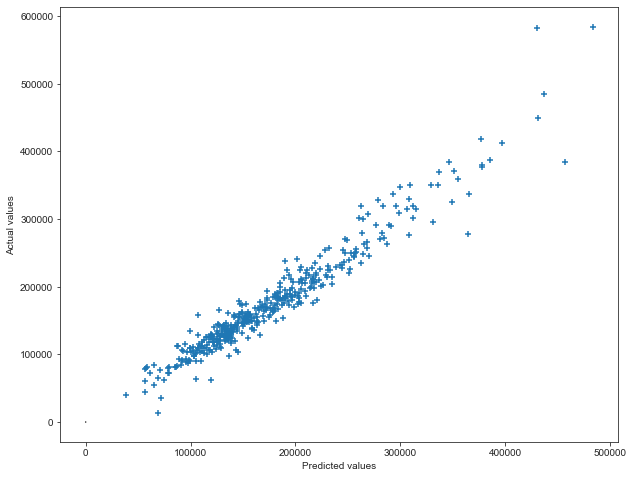

In [46]:
#Plots predicted values against actual values in the train/test split.
plt.figure(figsize=(10,8))
plt.scatter(np.exp(ypred), np.exp(y_test),marker = '+')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Plots x=y line
plt.plot([0,np.max(y_test)],[0,np.max(y_test)], c = 'k');

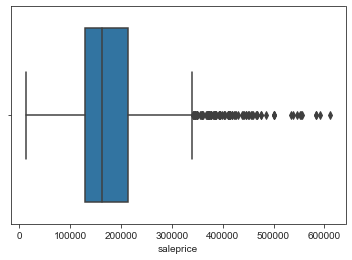

In [47]:
sns.boxplot(np.exp(df['saleprice']))

### Uploading to Kaggle

In [48]:
testset = pd.read_csv('../datasets/test_cleaned.csv')

In [49]:
testset.drop(columns='Unnamed: 0', inplace=True)
testset.head()

id        pid  lotfrontage  lotarea  alley  lotshape  utilities  \
0  2658  902301120    69.000000     9142      1         0          0   
1  2718  905108090    72.774648     9662      0         1          0   
2  2414  528218130    58.000000    17104      0         1          0   
3  1989  902207150    60.000000     8520      0         0          0   
4   625  535105100    75.192453     9500      0         1          0   

   landslope  overallqual  overallcond  yearbuilt  yearremod/add  masvnrarea  \
0          0            6            8       1910           1950         0.0   
1          0            5            4       1977           1977         0.0   
2          0            7            5       2006           2006         0.0   
3          0            5            6       1923           2006         0.0   
4          0            6            5       1963           1963       247.0   

   exterqual  extercond  bsmtqual  bsmtcond  bsmtexposure  bsmtfintype1  \
0          3          2         2         3             1             1   
1          3          3         4         3             1             1   
2          4          3         4         4             3             6   
3          4          3         3         3             1             1   
4          3          3         4         3             1             4   

   bsmtfinsf1  bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf  heatingqc  \
0           0             1           0       1020         1020          4   
1           0             1           0       1967         1967          3   
2         554             1           0        100          654          5   
3           0             1           0        968          968          3   
4         609             1           0        785         1394          4   

   electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  bsmtfullbath  \
0         3.0       908      1020             0       1928             0   
1         0.0      1967         0             0       1967             0   
2         0.0       664       832             0       1496             1   
3         0.0       968         0             0        968             0   
4         0.0      1394         0             0       1394             1   

   bsmthalfbath  fullbath  halfbath  bedroomabvgr  kitchenabvgr  kitchenqual  \
0             0         2         0             4             2            2   
1             0         2         0             6             2            3   
2             0         2         1             3             1            4   
3             0         1         0             2             1            3   
4             0         1         1             3             1            3   

   totrmsabvgrd  functional  fireplaces  fireplacequ  garageyrblt  \
0             9           0           0            0       1910.0   
1            10           0           0            0       1977.0   
2             7           0           1            4       2006.0   
3             5           0           0            0       1935.0   
4             6           0           2            4       1963.0   

  garagefinish  garagecars  garagearea  garagequal  garagecond  paveddrive  \
0          Unf           1         440           1           1           2   
1          Fin           2         580           3           3           2   
2          RFn           2         426           3           3           2   
3          Unf           2         480           2           3           0   
4          RFn           2         514           3           3           2   

   wooddecksf  openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  \
0           0           60            112          0            0         0   
1         170            0              0          0            0         0   
2         100           24              0          0            0         0   
3           0            0       

In [50]:
testset.drop(testset[testset['grlivarea'] > 4_500].index, inplace = True)
testset.drop(testset[testset['lotfrontage'] > 300].index, inplace = True)
testset.drop(testset[testset['lotarea'] > 100_000].index, inplace = True)

num_features=['lotfrontage', 'lotarea', '1stflrsf', 'grlivarea']

for feature in num_features:
    testset[feature]=np.log(testset[feature])

In [51]:
ypred.shape

(409,)

In [52]:
submission = pd.DataFrame(np.exp(ypred), columns =['saleprice'])
submission['id'] = testset['id']
submission = submission[['id', 'saleprice']]

In [53]:
submission.head()

id      saleprice
0  2658.0  308505.790914
1  2718.0  312188.147114
2  2414.0  230557.011598
3  1989.0  178382.120554
4   625.0  126465.079250

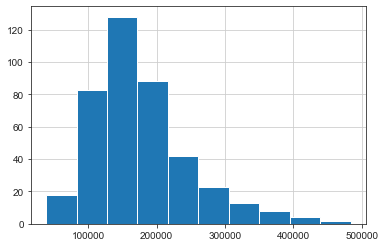

In [54]:
submission['saleprice'].hist()

In [55]:
submission.to_csv('../datasets/kaggle_submission.csv',index=False)

In [56]:
kaggle = pd.read_csv('../datasets/kaggle_submission.csv')